# 0. 사용한 패키지, 파이썬의 버전정보 

In [4]:
!python --version
print('='*100)
!pip show selenium
print('='*100)
!pip show pandas
print('='*100)
!pip show numpy
print('='*100)
!pip show beautifulsoup4

Python 3.11.5
Name: selenium
Version: 4.16.0
Summary: 
Home-page: https://www.selenium.dev
Author: 
Author-email: 
License: Apache 2.0
Location: C:\Users\kd010\miniconda3\Lib\site-packages
Requires: certifi, trio, trio-websocket, urllib3
Required-by: 
Name: pandas
Version: 2.1.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reprodu

# 1. 문제 1번

## 1.1. [문제 1번 테스트코드] 문제 1번의 풀이 작성을 위한 테스트코드

In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver


import re
import time
from selenium.webdriver.common.action_chains import ActionChains
from tqdm import tqdm
from bs4 import BeautifulSoup

from selenium.webdriver.common.by import By

In [2]:
driver = webdriver.Chrome()
driver.get('https://www.starbucks.co.kr/store/store_map.do')

### 1.1.1. [테스트코드] 스타벅스 매장찾기 지도페이지에서 지역별 검색을 통해 서울 선택하기

In [4]:
region_by = driver.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]')
region_by.click()

In [5]:
seoul_city = driver.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]')
seoul_city.click()

In [6]:
seoul_source = driver.find_elements(By.CLASS_NAME, 'set_gugun_cd_btn')

### 1.1.2. [테스트코드] 구들을 클릭하기 위해 html의 정보 분석하기

In [7]:
gu_indexes = [i.get_attribute('data-guguncd') for i in seoul_source]

In [8]:
gu_indexes = gu_indexes[1:]

- 서울에 스타벅스 있는 구가 25개이므로 일치한다

In [9]:
len(gu_indexes)

25

In [10]:
gu_indexes

['0101',
 '0120',
 '0102',
 '0103',
 '0104',
 '0105',
 '0121',
 '0106',
 '0107',
 '0108',
 '0122',
 '0109',
 '0110',
 '0111',
 '0112',
 '0123',
 '0113',
 '0114',
 '0115',
 '0116',
 '0124',
 '0117',
 '0118',
 '0119',
 '0125']

### 1.1.3. [테스트코드] 최종 코드를 작성하기위해 일단 강남구를 대상으로 html소스를 분석하고 매장정보와 주소를 추출해본다

In [11]:
# 구를 클릭해서 나온 페이지의 소스(매장정보)를 가져와서 필요한 정보만 가져오기
gu_test= driver.find_element(By.CSS_SELECTOR, '#mCSB_2_container > ul > li:nth-child(2)')   
gu_test.click()

- 밑의코드는 구이름을 클릭해 들어가면 나오는 페이지에서 매장이름과 주소 추출하기

In [12]:
inner_gu_test = driver.page_source

In [13]:
soup = BeautifulSoup(inner_gu_test, 'html.parser')

In [14]:
soup.select('#mCSB_3_container strong')

[<strong data-my_siren_order_store_yn="N" data-name="강남세곡DT" data-store="2217" data-yn="N">강남세곡DT  </strong>,
 <strong data-my_siren_order_store_yn="N" data-name="역삼이마트" data-store="1727" data-yn="N">역삼이마트  </strong>,
 <strong data-my_siren_order_store_yn="N" data-name="청담역" data-store="2204" data-yn="N">청담역  </strong>,
 <strong data-my_siren_order_store_yn="N" data-name="삼성동" data-store="1846" data-yn="N">삼성동  </strong>,
 <strong data-my_siren_order_store_yn="N" data-name="강남논현" data-store="1902" data-yn="N">강남논현  </strong>,
 <strong data-my_siren_order_store_yn="N" data-name="테헤란로아남타워" data-store="1752" data-yn="N">테헤란로아남타워  </strong>,
 <strong data-my_siren_order_store_yn="N" data-name="삼성역" data-store="2000" data-yn="N">삼성역  </strong>,
 <strong data-my_siren_order_store_yn="N" data-name="강남역신분당역사" data-store="1975" data-yn="N">강남역신분당역사  </strong>,
 <strong data-my_siren_order_store_yn="N" data-name="언주역" data-store="2057" data-yn="N">언주역  </strong>,
 <strong data-my_siren_order_sto

In [15]:
gangnam_test = [i.text.strip() for i in soup.select('#mCSB_3_container strong')]

- 강남구를 대상으로한 테스트 결과 점포이름들을 잘 가져왔다

In [16]:
gangnam_test

['강남세곡DT',
 '역삼이마트',
 '청담역',
 '삼성동',
 '강남논현',
 '테헤란로아남타워',
 '삼성역',
 '강남역신분당역사',
 '언주역',
 '대치삼성',
 '강남세곡',
 '도산사거리',
 '센터필드R',
 '코엑스아셈타워',
 '수서역사거리',
 '개포동',
 '대치한티',
 '도산가로수길',
 '논현힐탑',
 '선릉로',
 '포스코',
 '르네상스사거리',
 '압구정로데오역',
 '강남비젼타워',
 '아크로힐스논현',
 '신압구정',
 '역삼럭키',
 '코엑스사거리',
 '선릉역',
 '압구정미소',
 'GS타워',
 '삼성현대힐',
 '선정릉역',
 '학여울역',
 '아크플레이스',
 '포이',
 '대치역',
 '강남구청역',
 '큰길타워',
 '구역삼사거리',
 '압구정로',
 '압구정역',
 '선릉세화빌딩',
 '삼성',
 '신세계푸드마켓도곡',
 '대치',
 '학동역',
 '삼성교',
 '삼성도심공항',
 '청담',
 '강남대로',
 '역삼포스코',
 '역삼대로',
 '가로수길',
 '코엑스몰',
 '역삼초교사거리',
 '한티역',
 '청담사거리',
 '서울세관사거리',
 '도곡역',
 '신사역',
 '을지병원사거리',
 '포스코사거리',
 '대치사거리',
 '학동사거리',
 '강남우성',
 '청담스타R',
 '신사가로수',
 '압구정',
 '청담영동대로',
 '대치은마사거리',
 '강남R',
 '도곡공원',
 '강남구청정문',
 '스타필드코엑스몰R',
 '강남오거리',
 '봉은사로선정릉',
 '선릉동신빌딩R',
 '양재강남빌딩R',
 '수서역R',
 '압구정R',
 '삼성역섬유센터R',
 '코엑스별마당',
 '압구정윤성빌딩',
 '봉은사역',
 '대치재경빌딩',
 '국기원사거리',
 '신사역성일빌딩',
 '논현역사거리',
 '역삼아레나빌딩']

### 1.1.4. [테스트코드] 다시 강남구를 대상으로 매장 주소들을 가져와보는 테스트

In [17]:
gangnam_location_test_raw = soup.select('#mCSB_3_container p')

### 1.1.5. [테스트코드] 뒤의 전화번호를 지우고 주소만 가져오는 테스트
- 정규식을 이용하여 \<br/>부터 다 지우고 주소만 남기자
- re.sub('\<br/>.*', '', str(i))

In [18]:
import re
gangnam_location_test_raw

[<p class="result_details">서울특별시 강남구 헌릉로 727 (세곡동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 역삼로 310 (역삼동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 삼성로 709 (청담동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 영동대로96길 12 (삼성동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 강남대로 512 (논현동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 테헤란로 311 (역삼동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 테헤란로 620 (대치동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 강남대로 396 (역삼동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 봉은사로 222 (역삼동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 영동대로 237 (대치동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 헌릉로569길 18 (세곡동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 언주로 727 (논현동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 테헤란로 231 (역삼동)<br/>1522-3232</p>,
 <p class="result_details">서울특별시 강남구 영동대로 517 (삼성동)<br/>1522-3232</p>,
 <p cl

In [19]:
gangnam_location_test = [] * len(gangnam_location_test_raw)
for i in gangnam_location_test_raw:
    tmp = re.sub('<br/>.*', '', str(i))
    gangnam_location_test.append(tmp)

In [20]:
gangnam_location_test

['<p class="result_details">서울특별시 강남구 헌릉로 727 (세곡동)',
 '<p class="result_details">서울특별시 강남구 역삼로 310 (역삼동)',
 '<p class="result_details">서울특별시 강남구 삼성로 709 (청담동)',
 '<p class="result_details">서울특별시 강남구 영동대로96길 12 (삼성동)',
 '<p class="result_details">서울특별시 강남구 강남대로 512 (논현동)',
 '<p class="result_details">서울특별시 강남구 테헤란로 311 (역삼동)',
 '<p class="result_details">서울특별시 강남구 테헤란로 620 (대치동)',
 '<p class="result_details">서울특별시 강남구 강남대로 396 (역삼동)',
 '<p class="result_details">서울특별시 강남구 봉은사로 222 (역삼동)',
 '<p class="result_details">서울특별시 강남구 영동대로 237 (대치동)',
 '<p class="result_details">서울특별시 강남구 헌릉로569길 18 (세곡동)',
 '<p class="result_details">서울특별시 강남구 언주로 727 (논현동)',
 '<p class="result_details">서울특별시 강남구 테헤란로 231 (역삼동)',
 '<p class="result_details">서울특별시 강남구 영동대로 517 (삼성동)',
 '<p class="result_details">서울특별시 강남구 광평로 280 (수서동)',
 '<p class="result_details">서울특별시 강남구 선릉로 34 (개포동)',
 '<p class="result_details">서울특별시 강남구 선릉로 324 (대치동)',
 '<p class="result_details">서울특별시 강남구 도산대로 134, 2층 (논현동)',
 '<p class

In [21]:
driver.quit()

## 1.2. 강남구를 대상으로 테스트가 끝났다.

## 1.3. [문제1번 풀이]: 전체 구를 대상으로 for문을 돌려 실행하는 함수를 만들고 실행하자

- for 반복문을 통해 구이름을 클릭하고
- BeautifulSoup을 불러와서 리스트컴프리헨션으로 구별 정보를 리스트에 append
- 다시 지역검색 버튼 누르고
- 다시 서울을 누르고
- 다음 구 버튼 누르고 구의 매장 정보 가져오는 시행을 반복

In [49]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service

import re
import time
from selenium.webdriver.common.action_chains import ActionChains
from tqdm import tqdm
from bs4 import BeautifulSoup

from selenium.webdriver.common.by import By

In [50]:
driver = webdriver.Chrome()
driver.get('https://www.starbucks.co.kr/store/store_map.do')

## 서울의 각 구들에 위치한 스타벅스 매장 데이터 크롤링하는 함수만들기

In [51]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
import time
from tqdm import tqdm

def scrape_store_locations(driver):
    inner_gu_list = []
    actions = ActionChains(driver)
    list_lat = []
    list_lng = []

    for i in tqdm(range(2, 27)):
        # 지역 검색 클릭
        region_by = driver.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]')
        actions.move_to_element(region_by).click().perform()
        time.sleep(2.5)
        
        # 서울 클릭
        seoul_city = driver.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]')
        actions.move_to_element(seoul_city).click().perform()
        time.sleep(2.5)

        # 구들을 클릭함
        element_to_click = driver.find_element(By.CSS_SELECTOR, f'#mCSB_2_container > ul > li:nth-child({i})')
        actions.move_to_element(element_to_click).click().perform()
        time.sleep(2.5)

        # 페이지 소스 가져오기 및 파싱
        req = driver.page_source
        soup = BeautifulSoup(req, 'html.parser')
        tmp = soup.select('#mCSB_3_container li')
        inner_gu_list.extend(tmp)

        # 좌표값 추출 및 리스트에 추가
        tmp_lat = [val.get('data-lat') for val in tmp if val.get('data-lat')]
        tmp_lng = [val.get('data-long') for val in tmp if val.get('data-long')]
        list_lat.extend(tmp_lat)
        list_lng.extend(tmp_lng)

    return list_lat, list_lng, inner_gu_list

In [52]:
try:
    res = scrape_store_locations(driver)
finally:
    driver.quit()

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [03:45<00:00,  9.03s/it]


In [53]:
list_lat = res[0]
list_lng = res[1]
inner_gu_list = res[2]

### 1.3.1. [문제1번 풀이] 서울에 위치한 스타벅스 매장들의 위도, 경도 담은 리스트 확인하기

In [54]:
# 모두 610개 요소가 담긴 리스트(서울에 위치한 스타벅스 매장이 610개라서 데이터 정확히 추출함)
inner_gu_list

[<li class="quickResultLstCon" data-code="4228" data-hlytag="null" data-index="0" data-lat="37.466993809277" data-long="127.118330806807" data-name="강남세곡DT" data-storecd="2217" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="강남세곡DT" data-store="2217" data-yn="N">강남세곡DT  </strong> <p class="result_details">서울특별시 강남구 헌릉로 727 (세곡동)<br/>1522-3232</p> <i class="pin_generalDT">리저브 매장 2번</i></li>,
 <li class="quickResultLstCon" data-code="4043" data-hlytag="null" data-index="1" data-lat="37.499367" data-long="127.048425" data-name="역삼이마트" data-storecd="1727" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼이마트" data-store="1727" data-yn="N">역삼이마트  </strong> <p class="result_details">서울특별시 강남구 역삼로 310 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>,
 <li class="quickResultLstCon" data-code="4486" data-hlytag="null" data-index="2" data-lat="37.5194407323478" data-long="127.049552661542" data-name="청담역" data-storecd="22

In [55]:
list_lat, list_lng

(['37.466993809277',
  '37.499367',
  '37.5194407323478',
  '37.510843366121534',
  '37.5078978596254',
  '37.50383',
  '37.509206962541256',
  '37.4970572543978',
  '37.507775',
  '37.500313',
  '37.467274319644',
  '37.51966',
  '37.50369465391196',
  '37.513019',
  '37.4873267937748',
  '37.4828551359882',
  '37.4984818',
  '37.51736229999999',
  '37.5115577',
  '37.505053',
  '37.50576',
  '37.502721',
  '37.526549',
  '37.4964557',
  '37.50898041',
  '37.528115',
  '37.492209',
  '37.515351',
  '37.50393894',
  '37.52405601',
  '37.5018592',
  '37.51354184',
  '37.51075489999999',
  '37.49803646',
  '37.49971982',
  '37.47781106',
  '37.493554',
  '37.5165849',
  '37.50236693',
  '37.49592355',
  '37.52680046',
  '37.52674095',
  '37.50377562',
  '37.50703529',
  '37.490298',
  '37.49966175',
  '37.51464884',
  '37.507794',
  '37.5097863',
  '37.5243631',
  '37.50314',
  '37.499721',
  '37.501623',
  '37.5231593',
  '37.513715',
  '37.4941059',
  '37.496801',
  '37.5236351',
  '37

### 1.3.2. [문제1번 풀이] 크롤링한 데이터들을 정제하여 매장이름, 매장주소, 매장들이 속한 구들의 리스트 만드는 함수 정의하기

In [56]:
import re

def extract_starbucks_locations(inner_gu_list):
    starbucks_loc_raw = [i.select('p') for i in inner_gu_list]
    starbucks_loc_tmp = []
    for loc in starbucks_loc_raw:
        starbucks_loc_tmp.extend(loc)

    starbucks_locations = []
    for loc in starbucks_loc_tmp:
        tmp = re.sub('.*\">', '', str(loc))
        tmp_res = re.sub('<br/>.*', '', tmp)
        starbucks_locations.append(tmp_res)

    return starbucks_locations


def extract_starbucks_gu_names(starbucks_locations):
    gu_names = [loc.split()[1] for loc in starbucks_locations if len(loc.split()) > 1]
    return gu_names


def extract_starbucks_store_names(inner_gu_list):
    starbucks_names_raw = []
    for i in inner_gu_list:
        starbucks_names_raw.extend(i.select('strong'))

    starbucks_names = [name.text.strip() for name in starbucks_names_raw]
    return starbucks_names

In [57]:
starbucks_locations = extract_starbucks_locations(inner_gu_list)
gu_names = extract_starbucks_gu_names(starbucks_locations)
starbucks_names = extract_starbucks_store_names(inner_gu_list)

### 1.3.3. [문제1번 풀이] 서울의 각 구에 속한 스타벅스 매장이름, 구이름, 주소, 좌표 정보를 담은 데이터프레임 만들기

In [58]:
starbucks_seoul = pd.DataFrame({'매장이름':starbucks_names, 
                                '구이름':gu_names, 
                                '주소':starbucks_locations,
                                'lat':list_lat,
                                'lng':list_lng})

In [59]:
starbucks_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   매장이름    610 non-null    object
 1   구이름     610 non-null    object
 2   주소      610 non-null    object
 3   lat     610 non-null    object
 4   lng     610 non-null    object
dtypes: object(5)
memory usage: 24.0+ KB


In [60]:
starbucks_seoul[['lat','lng']] = starbucks_seoul[['lat', 'lng']].astype('float')

In [61]:
starbucks_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   매장이름    610 non-null    object 
 1   구이름     610 non-null    object 
 2   주소      610 non-null    object 
 3   lat     610 non-null    float64
 4   lng     610 non-null    float64
dtypes: float64(2), object(3)
memory usage: 24.0+ KB


In [62]:
# 총 25개 구를 가져왔는지 테스트
print(f'스타벅스가 위치한 서울의 구 갯수: {len(starbucks_seoul["구이름"].unique())} \n\n {starbucks_seoul["구이름"].unique()}')

스타벅스가 위치한 서울의 구 갯수: 25 

 ['강남구' '강동구' '강북구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구' '도봉구' '동대문구' '동작구'
 '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '종로구' '중구'
 '중랑구']


In [63]:
# 중복 행 확인
duplicates = starbucks_seoul.duplicated()

# 중복 행이 있는지 여부를 확인
has_duplicates = duplicates.any()

print(f"중복된 행의 갯수: {int(has_duplicates)}")

중복된 행의 갯수: 0


### 1.3.4. [문제1번 풀이] 근데 서울에 있는 스타벅스 총 매장수는 610개인데 주소의 고유값이 605개임
- value_counts()를 해봤다
- 중복되는 주소(아마도 한 건물에 여러 매장있거나 한듯)가 5개있음

In [64]:
starbucks_seoul['주소'].nunique()

605

In [65]:
starbucks_seoul['주소'].value_counts()

주소
서울특별시 마포구 양화로 45 (서교동, 메세나폴리스)            2
서울특별시 종로구 새문안로 29 (평동)                    2
서울특별시 구로구 경인로 662 (신도림동)                  2
서울특별시 서초구 신반포로 176 (반포동)                  2
서울특별시 노원구 마들로3길 15 (월계동)                  2
                                         ..
서울특별시 노원구 중계로 217, 중흥빌딩 103,203호 (중계동)    1
서울특별시 노원구 동일로 1081 (공릉동)                  1
서울특별시 노원구 노원로 569 (상계동, 임광아파트)            1
서울특별시 노원구 동일로 1015 (공릉동)                  1
서울특별시 중랑구 상봉로 131 (상봉동, 상봉 듀오트리스 주상복합)    1
Name: count, Length: 605, dtype: int64

### 1.3.5. [문제1번 풀이] 주소가 같은 매장들 5쌍 목록
- 1. (합정메세나몰점, 합정폴리스R점) 2. (강북삼성병원점, 강북삼성병원1층점)
- 3. (현대디큐브B2점, 현대디큐브2F점) 4. (센트럴F1점, 센트럴시티점)
- 5. (월계이마트점, 월계트레이더스점) 

In [66]:
starbucks_seoul['매장이름'].nunique()

610

## 1.4. [문제 1번 답: 서울에 위치한 스타벅스 매장들의 매장이름, 구이름, 주소 담은 데이터프레임 만들기]

In [67]:
starbucks_seoul

매장이름  구이름                                      주소        lat  \
0    강남세곡DT  강남구                 서울특별시 강남구 헌릉로 727 (세곡동)  37.466994   
1     역삼이마트  강남구                 서울특별시 강남구 역삼로 310 (역삼동)  37.499367   
2       청담역  강남구                 서울특별시 강남구 삼성로 709 (청담동)  37.519441   
3       삼성동  강남구              서울특별시 강남구 영동대로96길 12 (삼성동)  37.510843   
4      강남논현  강남구                서울특별시 강남구 강남대로 512 (논현동)  37.507898   
..      ...  ...                                     ...        ...   
605     상봉역  중랑구                 서울특별시 중랑구 망우로 307 (상봉동)  37.596890   
606    사가정역  중랑구                       서울특별시 중랑구 면목로 310  37.579594   
607    중랑구청  중랑구                        서울특별시 중랑구 신내로 72  37.605389   
608     중랑역  중랑구                서울특별시 중랑구 망우로30길 3 (상봉동)  37.593033   
609      상봉  중랑구  서울특별시 중랑구 상봉로 131 (상봉동, 상봉 듀오트리스 주상복합)  37.597842   

            lng  
0    127.118331  
1    127.048425  
2    127.049553  
3    127.063633  
4    127.023339  
..          ...  
605  127.086470  
606  127.087966  
607  127.095756  
608  127.074736  
609  127.092509  

[610 rows x 5 columns]

In [68]:
starbucks_seoul.to_csv('../datas/eda_01_starbucks_seoul.csv', encoding = 'cp949')

# 2. 문제 2번

In [69]:
seoul_gu_raw = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구',
                '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구',
                '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

## 2.1. 2번 문제 풀이를 위한 [테스트코드]

In [70]:
seoul_gu = ['서울' + ' ' + i for i in seoul_gu_raw]

In [71]:
seoul_gu

['서울 강남구',
 '서울 강동구',
 '서울 강북구',
 '서울 강서구',
 '서울 관악구',
 '서울 광진구',
 '서울 구로구',
 '서울 금천구',
 '서울 노원구',
 '서울 도봉구',
 '서울 동대문구',
 '서울 동작구',
 '서울 마포구',
 '서울 서대문구',
 '서울 서초구',
 '서울 성동구',
 '서울 성북구',
 '서울 송파구',
 '서울 양천구',
 '서울 영등포구',
 '서울 용산구',
 '서울 은평구',
 '서울 종로구',
 '서울 중구',
 '서울 중랑구']

In [72]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service

import re
import time
from selenium.webdriver.common.action_chains import ActionChains
from tqdm import tqdm
from bs4 import BeautifulSoup

from selenium.webdriver.common.by import By

In [73]:
driver = webdriver.Chrome()
driver.get('https://www.ediya.com/contents/find_store.html')

In [74]:
actions = ActionChains(driver)

### 2.1.1. [문제 2번 테스트코드] 이디야커피 매장찾기 페이지에서 주소버튼 누르기

In [75]:
ediya_find_test = driver.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]')
actions.move_to_element(ediya_find_test).click().perform()

### 2.1.2. [문제 2번 테스트코드] 검색창에 '서울 강남구' 입력하기

In [76]:
ediya_move_to_srch = driver.find_element(By.XPATH, '//*[@id="keyword_div"]/form')
actions.move_to_element(ediya_move_to_srch).click().perform()
actions.send_keys(seoul_gu[0]).perform()

### 2.1.3. [문제 2번 테스트코드] 검색버튼 누르기

In [77]:
ediya_srch = driver.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button')
actions.move_to_element(ediya_srch).click().perform()

### 2.1.4. [문제 2번 테스트코드] 매장정보페이지의 html소스 모두 가져오기

In [79]:
req = driver.page_source
soup = BeautifulSoup(req, 'html.parser')

### 2.1.5. [문제 2번 테스트코드] 강남구를 대상으로 매장이름, 주소 추출하기
- placesList가 id로 지정된 하위 경로 중에
- 좌표 정보가 \<a>태그의 onclick 속성에 들어있기는 한데 누락된 게 많아서 그냥 문제 3번에서 구글맵 API로 추출하기 
- \<dl>태그에 매장정보가 들어있음
- \<dl> 태그 하위에 \<dt>태그에 매장이름이 들어있고
    - \<dd> 태그에 주소가 들어있음

In [80]:
ediya_test = soup.select('#placesList dl')

In [81]:
ediya_test

[<dl><dt>강남YMCA점</dt> <dd>서울 강남구 논현동</dd></dl>,
 <dl><dt>강남구청역아이티웨딩점</dt> <dd>서울 강남구 학동로 338 (논현동, 강남파라곤)</dd></dl>,
 <dl><dt>강남논현학동점</dt> <dd>서울 강남구 논현로131길 28 (논현동)</dd></dl>,
 <dl><dt>강남대치점</dt> <dd>서울 강남구 역삼로 415 (대치동, 성진빌딩)</dd></dl>,
 <dl><dt>강남도산점</dt> <dd>서울 강남구 도산대로37길 20 (신사동)</dd></dl>,
 <dl><dt>강남율현점</dt> <dd>서울 강남구 밤고개로21길 8 (율현동, 세곡프라자)</dd></dl>,
 <dl><dt>강남자곡점</dt> <dd>서울 강남구 자곡로 180 (자곡동, 강남유탑유블레스)</dd></dl>,
 <dl><dt>개포동역점</dt> <dd>서울 강남구 개포로82길 11 (개포동, 삼우빌딩)</dd></dl>,
 <dl><dt>건설회관점</dt> <dd>서울 강남구 언주로 711 (논현동)</dd></dl>,
 <dl><dt>대청역점</dt> <dd>서울 강남구 개포로109길 34 (개포동, 대청프라자)</dd></dl>,
 <dl><dt>도곡2동점</dt> <dd>서울 강남구 논현로 142 (도곡동, 동현빌딩)</dd></dl>,
 <dl><dt>도산사거리점</dt> <dd>서울 강남구 논현동 </dd></dl>,
 <dl><dt>삼성대치점</dt> <dd>서울 강남구 삼성로64길 32 (대치동, 주성빌딩)</dd></dl>,
 <dl><dt>삼성동점</dt> <dd>서울 강남구 테헤란로88길 10 (대치동)</dd></dl>,
 <dl><dt>삼성중앙역점</dt> <dd>서울 강남구 삼성로 608 (삼성동, 우창빌딩)</dd></dl>,
 <dl><dt>삼성한전점</dt> <dd>서울 강남구 테헤란로107길 11 (삼성동)</dd></dl>,
 <dl><dt>선릉사거리점</dt> <dd>서울 강남

### 2.1.6. [문제 2번 테스트코드] 강남구에 위치한 이디야 매장 이름 추출하고 리스트에 저장하기

In [82]:
ediya_names_test = [i.text for i in soup.select('#placesList dl dt')]

In [83]:
ediya_names_test

['강남YMCA점',
 '강남구청역아이티웨딩점',
 '강남논현학동점',
 '강남대치점',
 '강남도산점',
 '강남율현점',
 '강남자곡점',
 '개포동역점',
 '건설회관점',
 '대청역점',
 '도곡2동점',
 '도산사거리점',
 '삼성대치점',
 '삼성동점',
 '삼성중앙역점',
 '삼성한전점',
 '선릉사거리점',
 '선릉역점',
 '수서역점',
 '신사역점',
 '신사점',
 '압구정로데오역점',
 '역삼더블루점',
 '역삼상록점',
 '역삼역점',
 '역삼월드점',
 '역삼점',
 '역삼중앙점',
 '역삼충현점',
 '역삼플래티넘점',
 '을지병원사거리점',
 '이디야커피랩',
 '일원동점',
 '청담사거리점',
 '청담역점',
 '포이사거리점',
 '학동역점',
 '학동제마점',
 '한티역점']

### 2.1.7. [문제 2번 테스트코드] 강남구에 위치한 이디야 매장 주소 추출하고 리스트에 저장하기

In [84]:
ediya_loc_test = [i.text for i in soup.select('#placesList dl dd')]

In [85]:
ediya_loc_test

['서울 강남구 논현동',
 '서울 강남구 학동로 338 (논현동, 강남파라곤)',
 '서울 강남구 논현로131길 28 (논현동)',
 '서울 강남구 역삼로 415 (대치동, 성진빌딩)',
 '서울 강남구 도산대로37길 20 (신사동)',
 '서울 강남구 밤고개로21길 8 (율현동, 세곡프라자)',
 '서울 강남구 자곡로 180 (자곡동, 강남유탑유블레스)',
 '서울 강남구 개포로82길 11 (개포동, 삼우빌딩)',
 '서울 강남구 언주로 711 (논현동)',
 '서울 강남구 개포로109길 34 (개포동, 대청프라자)',
 '서울 강남구 논현로 142 (도곡동, 동현빌딩)',
 '서울 강남구 논현동 ',
 '서울 강남구 삼성로64길 32 (대치동, 주성빌딩)',
 '서울 강남구 테헤란로88길 10 (대치동)',
 '서울 강남구 삼성로 608 (삼성동, 우창빌딩)',
 '서울 강남구 테헤란로107길 11 (삼성동)',
 '서울 강남구 선릉로 519 (역삼동, 삼능빌딩)',
 '서울 강남구 테헤란로 332 (역삼동, HJ타워)',
 '서울 강남구 광평로 280 (수서동, 로즈데일오피스텔)',
 '서울 강남구 압구정로2길 62 (신사동)',
 '서울 강남구 도산대로 118 (논현동)',
 '서울 강남구 선릉로161길 20 (신사동)',
 '서울 강남구 논현로63길 16 (역삼동, 역삼종합시장 더블루)',
 '서울 강남구 테헤란로43길 18 (역삼동, SC빌딩)',
 '서울 강남구 테헤란로25길 17 (역삼동)',
 '서울 강남구 역삼로52길 14 (역삼동, 도곡프라자)',
 '서울 강남구 논현로72길 13 (역삼동)',
 '서울 강남구 언주로81길 8 (역삼동)',
 '서울 강남구 논현로98길 7 (역삼동)',
 '서울 강남구 테헤란로4길 46 (역삼동, 쌍용플래티넘밸류)',
 '서울 강남구 도산대로30길 7 (논현동)',
 '서울 강남구 논현로 636 (논현동, 이디야빌딩)',
 '서울 강남구 양재대로27길 20 (일원동)',
 '서울 강남구 도산대로 521 (

In [86]:
driver.quit()

## 2.2. [문제 2번 풀이]:

In [87]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service

import re
import time
from selenium.webdriver.common.action_chains import ActionChains
from tqdm import tqdm
from bs4 import BeautifulSoup

from selenium.webdriver.common.by import By

In [88]:
driver = webdriver.Chrome()
driver.get('https://www.ediya.com/contents/find_store.html')

In [89]:
seoul_gu_raw = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구',
                '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구',
                '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

In [90]:
seoul_gu = ['서울' + ' ' + i for i in seoul_gu_raw]

### 2.2.1. [문제2번 풀이]이디야 매장찾기 페이지에서 주소버튼 클릭하기

In [91]:
actions = ActionChains(driver)

### 2.2.2. [문제2번 풀이]for문을 반복하여 주소에 서울의 자치구들을 검색하고 데이터 크롤링해오기

In [92]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
import time
from tqdm import tqdm

def scrape_ediya_locations(driver, seoul_gu):
    ediya_datas_raw = []
    actions = ActionChains(driver)

    for gu_name in tqdm(seoul_gu):
        # 주소 버튼 클릭하기
        ediya_find_test = driver.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]')
        actions.move_to_element(ediya_find_test).click().perform()
        time.sleep(2.5)

        # 검색창에 검색어(서울 구 이름들) 입력
        ediya_move_to_srch = driver.find_element(By.XPATH, '//*[@id="keyword_div"]/form')
        actions.move_to_element(ediya_move_to_srch).click().perform()
        time.sleep(1)
        actions.send_keys(gu_name).perform()
        time.sleep(2.5)

        # 검색 버튼 클릭
        ediya_srch = driver.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button')
        actions.move_to_element(ediya_srch).click().perform()
        time.sleep(2.5)

        # 페이지 소스 가져오기
        req = driver.page_source
        ediya_raw = BeautifulSoup(req, 'html.parser')
        ediya_datas_raw.extend(ediya_raw)

    return ediya_datas_raw

In [93]:
try:
    ediya_data = scrape_ediya_locations(driver, seoul_gu)
finally:
    driver.quit()

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [04:07<00:00,  9.92s/it]


In [95]:
ediya_datas_raw = ediya_data

In [96]:
print(len(ediya_datas_raw))

25


### 2.2.3. [문제2번 풀이]아까 [테스트코드] 참고하여 매장이름, 주소 데이터 정리하기
- 지금 ediya_datas_raw에는 각 구별(총 25개구)의 매장정보가 들어있음(즉, 리스트 길이가 25)

### 2.2.4. [문제2번 풀이]서울에 위치한 이디야 매장이름, 매장주소, 구이름 추출하는 함수 만들기

In [97]:
from bs4 import BeautifulSoup

def get_ediya_names(ediya_datas_raw):
    ediya_names_raw = []
    for data in ediya_datas_raw:
        ediya_names_raw.extend(data.select('#placesList dl dt'))
    return [element.text.strip() for element in ediya_names_raw]

def get_ediya_locations(ediya_datas_raw):
    ediya_locations_raw = []
    for data in ediya_datas_raw:
        ediya_locations_raw.extend(data.select('#placesList dl dd'))
    return [element.text.strip() for element in ediya_locations_raw]

def get_ediya_gus(ediya_locations):
    return [location.split()[1] for location in ediya_locations if len(location.split()) > 1]

In [98]:
ediya_names = get_ediya_names(ediya_datas_raw)
ediya_locations = get_ediya_locations(ediya_datas_raw)
ediya_gus = get_ediya_gus(ediya_locations)

## 2.3. [문제2번 풀이] 서울에 위치한 이디야커피 매장이름, 구이름, 주소 정보 담은 데이터프레임 만들기

In [99]:
ediya_seoul = pd.DataFrame({'매장이름':ediya_names, '구이름':ediya_gus, '주소':ediya_locations})

In [100]:
ediya_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   매장이름    601 non-null    object
 1   구이름     601 non-null    object
 2   주소      601 non-null    object
dtypes: object(3)
memory usage: 14.2+ KB


In [101]:
# 중복 행 확인
ediya_duplicates = ediya_seoul.duplicated()

# 중복 행이 있는지 여부를 확인
ediya_has_duplicates = ediya_duplicates.any()

print(f'중복 행 몇 개인가? {int(ediya_has_duplicates)}')


중복 행 몇 개인가? 0


In [102]:
ediya_seoul['구이름'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [103]:
ediya_seoul['구이름'].nunique()

25

In [104]:
ediya_seoul['매장이름'].nunique()

601

### 2.3.1. [문제2번 풀이] 서울에 위치한 모든 이디야 매장 갯수는 601개인데 주소의 고유값이 596이라서 value_counts()로 확인

In [105]:
ediya_seoul['주소'].nunique()

596

### 2.3.2. [문제2번 풀이] 주소가 동일한 데이터가 총 4개 (아마 주소를 동까지만 써서 같은동에 여러개 있거나 같은건물에 여러 이디야 있는듯)

In [106]:
ediya_seoul['주소'].value_counts() 

주소
서울 서초구 서초동                        3
서울 강남구 논현동                        2
서울 서초구 반포대로 201 (반포동, 국립중앙도서관)    2
서울 종로구 낙원동                        2
서울 송파구 백제고분로 126 (잠실동, 오룡빌딩)      1
                                 ..
서울 노원구 동일로 1650 (상계동)             1
서울 노원구 노원로 3 (공릉동)                1
서울 노원구 동일로 1689 (상계동, 하이베라스)      1
서울 노원구 공릉로46길 6 (공릉동)             1
서울 중랑구 신내로25가길 2 (묵동, 현동학당)       1
Name: count, Length: 596, dtype: int64

## 2.4. [문제2번 풀이] 주소가 '동'단위까지 나왔거나 '구'단위 아니면 '서울' 까지만 표시되어있을지도 모르는 불완전한 주소 데이터를 찾아보자

In [107]:
ediya_seoul['주소'] = ediya_seoul['주소'].apply(lambda x: x + 'F' if len(x.split()) <=3 else x)

## 2.5. [문제2번 풀이] 밑의 코드출력 결과를 보면 14개의 매장에 대해 주소가 불완전함
- 그래서 14개의 매장에 대해서 상세주소를 직접 찾아 입력하였다

In [108]:
print(len(ediya_seoul[ediya_seoul['주소'].str.contains('F')]), 
      '\n\n\n' ,
      ediya_seoul[ediya_seoul['주소'].str.contains('F')])

14 


         매장이름   구이름            주소
0    강남YMCA점   강남구   서울 강남구 논현동F
11    도산사거리점   강남구   서울 강남구 논현동F
139  동서울터미널점   광진구   서울 광진구 구의동F
186     시흥동점   금천구   서울 금천구 시흥동F
305    무악재역점  서대문구  서울 서대문구 홍제동F
308     서대문점  서대문구  서울 서대문구 냉천동F
323   남부터미널점   서초구   서울 서초구 서초동F
329    서울교대점   서초구   서울 서초구 서초동F
331     서초역점   서초구   서울 서초구 서초동F
342  청계산입구역점   서초구   서울 서초구 신원동F
521     낙원동점   종로구   서울 종로구 낙원동F
529     상명대점   종로구   서울 종로구 홍지동F
538    종로구청점   종로구   서울 종로구 수송동F
543    탑골공원점   종로구   서울 종로구 낙원동F


In [109]:
incomplete_locs = [
                   '서울 강남구 논현동 230-2',
                   '서울 강남구 논현동 98-12',
                   '서울 광진구 구의동 547 강변현대하이엘 109호',
                   '서울 금천구 시흥동 890-10',
                   '서울 서대문구 홍제동 90-47',
                   '서울 서대문구 냉천동 248번지 1층',
                   '서울 서초구 서초동 1444-2',
                   '서울 서초구 서초동 1577-11',
                   '서울 서초구 서초동 1510-2',
                   '서울 서초구 신원동 271-23',
                   '서울 종로구 낙원동 46-4',
                   '서울 종로구 홍지동 60-2',
                   '서울 종로구 수송동 58 두산위브파빌리온 1층',
                   '서울 종로구 낙원동 205'
]

In [110]:
replacement_iter = iter(incomplete_locs)
ediya_seoul['주소'] = ediya_seoul['주소'].apply(lambda x: next(replacement_iter) if 'F' in x else x)

## 2.6. [문제2번풀이] 근데 서울에 위치한 이디야 매장이 총 601개인데 '주소' 칼럼의 고유값이 600이라서 더 분석해보았다
- 국립중앙도서관에 이디야가 2개 위치하고 있음(각각 본관, 디지털관 빌딩에 있음)
- 따라서 데이터정제가 모두 완료됨

In [111]:
ediya_seoul['주소'].nunique()

600

## 2.7. [문제2번풀이] 구글맵 geocode API가져와서 서울에 위치한 이디야커피 매장들의 주소를 통해 좌표가져오기
### 구글맵 geocode API를 작동시키는 코드에서 try, except를 통해 오류가 발생하는 인덱스 번호는 리스트에 따로 저장함

In [112]:
import googlemaps
# api_key = ''
# gmaps = googlemaps.Client(key = api_key)

In [113]:
lat = {}
lng = {}
incomplete_indx = []

for idx, row in tqdm(ediya_seoul.iterrows()):
    geo_location = gmaps.geocode(row['주소'])
    
    try:
        lat[idx] = geo_location[0]['geometry']['location']['lat']
        lng[idx] = geo_location[0]['geometry']['location']['lng']
    except:
        print(f'오류가 발생하였습니다. 인덱스번호: {idx}')
        incomplete_indx.append(idx)

294it [00:44,  7.02it/s]

오류가 발생하였습니다. 인덱스번호: 292


303it [00:45,  6.95it/s]

오류가 발생하였습니다. 인덱스번호: 301


393it [00:58,  6.58it/s]

오류가 발생하였습니다. 인덱스번호: 391


423it [01:02,  6.87it/s]

오류가 발생하였습니다. 인덱스번호: 422


457it [01:07,  7.44it/s]

오류가 발생하였습니다. 인덱스번호: 455


601it [01:28,  6.80it/s]


## 2.7.1. [문제2번풀이] [구글맵을 통해 좌표 가져오지 못한 서울에 위치한 이디야 매장들 조회해보기] 

In [114]:
ediya_seoul.loc[incomplete_indx, :]

매장이름   구이름                                   주소
292    신촌하나로마트점   마포구          서울 마포구 신촌로 66 (노고산동, 농협중앙회)
301        가재울점  서대문구  서울 서대문구 수색로 100 (북가좌동, DMC래미안e편한세상)
391  가든파이브테크노관점   송파구        서울 송파구 충민로 66 (문정동, 가든파이브라이프)
422        잠실역점   송파구       서울 송파구 송파대로 567 (잠실동, 잠실주공아파트)
455        라이프점  영등포구       서울 영등포구 63로 40 (여의도동, 라이프오피스텔)

## 2.7.2 [문제2번풀이] 위의 코드 출력결과에서 보이듯이 구글 Geocode API에서 좌표 찾지 못한 값들은 직접 찾아 입력하였다

In [115]:
incomplete_lat = [37.55614611033194, 37.57560076670066, 37.47814934830104, 37.51155464747852, 37.51958462677674]
incomplete_lng = [126.9330545077091, 126.91227551379457, 127.12433971696123, 127.07936438439376, 126.93926349146437]
for i, v in enumerate(incomplete_indx):
    lat[v] = incomplete_lat[i]
    lng[v] = incomplete_lng[i]
print(len(lat), len(lng))

601 601


In [116]:
ediya_seoul.loc[:,'lat'] = lat
ediya_seoul.loc[:,'lng'] = lng

In [117]:
ediya_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   매장이름    601 non-null    object 
 1   구이름     601 non-null    object 
 2   주소      601 non-null    object 
 3   lat     601 non-null    float64
 4   lng     601 non-null    float64
dtypes: float64(2), object(3)
memory usage: 23.6+ KB


## 2.8. [문제2번 답]: 서울에 위치한 이디야 매장이름, 구이름, 주소를 담은 데이터프레임

In [118]:
ediya_seoul

매장이름  구이름                            주소        lat         lng
0        강남YMCA점  강남구              서울 강남구 논현동 230-2  37.509943  127.035702
1    강남구청역아이티웨딩점  강남구   서울 강남구 학동로 338 (논현동, 강남파라곤)  37.516551  127.040139
2        강남논현학동점  강남구       서울 강남구 논현로131길 28 (논현동)  37.515190  127.027554
3          강남대치점  강남구    서울 강남구 역삼로 415 (대치동, 성진빌딩)  37.501434  127.052328
4          강남도산점  강남구       서울 강남구 도산대로37길 20 (신사동)  37.522282  127.031480
..           ...  ...                           ...        ...         ...
596       중랑교차로점  중랑구          서울 중랑구 동일로 683 (면목동)  37.591448  127.079882
597        중랑묵동점  중랑구  서울 중랑구 동일로 932 (묵동, 묵동자이아파트)  37.613779  127.077524
598         중랑역점  중랑구          서울 중랑구 망우로 198 (상봉동)  37.593285  127.074889
599         중화동점  중랑구        서울 중랑구 동일로129길 1 (중화동)  37.601957  127.086627
600        화랑대역점  중랑구   서울 중랑구 신내로25가길 2 (묵동, 현동학당)  37.619451  127.084160

[601 rows x 5 columns]

In [119]:
ediya_seoul.to_csv('../datas/eda_01_ediya_seoul.csv', encoding = 'cp949')

# 3. 문제 3번

In [120]:
!pip install geopy

In [121]:
!pip install cython

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mat
import folium
import koreanize_matplotlib
from folium.plugins import MarkerCluster
from geopy.distance import geodesic

In [123]:
from selenium import webdriver
import googlemaps

In [124]:
starbucks_df = pd.read_csv('../datas/eda_01_starbucks_seoul.csv', encoding = 'cp949', index_col = 0)
starbucks_df

매장이름  구이름                                      주소        lat  \
0    강남세곡DT  강남구                 서울특별시 강남구 헌릉로 727 (세곡동)  37.466994   
1     역삼이마트  강남구                 서울특별시 강남구 역삼로 310 (역삼동)  37.499367   
2       청담역  강남구                 서울특별시 강남구 삼성로 709 (청담동)  37.519441   
3       삼성동  강남구              서울특별시 강남구 영동대로96길 12 (삼성동)  37.510843   
4      강남논현  강남구                서울특별시 강남구 강남대로 512 (논현동)  37.507898   
..      ...  ...                                     ...        ...   
605     상봉역  중랑구                 서울특별시 중랑구 망우로 307 (상봉동)  37.596890   
606    사가정역  중랑구                       서울특별시 중랑구 면목로 310  37.579594   
607    중랑구청  중랑구                        서울특별시 중랑구 신내로 72  37.605389   
608     중랑역  중랑구                서울특별시 중랑구 망우로30길 3 (상봉동)  37.593033   
609      상봉  중랑구  서울특별시 중랑구 상봉로 131 (상봉동, 상봉 듀오트리스 주상복합)  37.597842   

            lng  
0    127.118331  
1    127.048425  
2    127.049553  
3    127.063633  
4    127.023339  
..          ...  
605  127.086470  
606  127.087966  
607  127.095756  
608  127.074736  
609  127.092509  

[610 rows x 5 columns]

In [125]:
ediya_df = pd.read_csv('../datas/eda_01_ediya_seoul.csv', encoding = 'cp949', index_col = 0)
ediya_df

매장이름  구이름                            주소        lat         lng
0        강남YMCA점  강남구              서울 강남구 논현동 230-2  37.509943  127.035702
1    강남구청역아이티웨딩점  강남구   서울 강남구 학동로 338 (논현동, 강남파라곤)  37.516551  127.040139
2        강남논현학동점  강남구       서울 강남구 논현로131길 28 (논현동)  37.515190  127.027554
3          강남대치점  강남구    서울 강남구 역삼로 415 (대치동, 성진빌딩)  37.501434  127.052328
4          강남도산점  강남구       서울 강남구 도산대로37길 20 (신사동)  37.522282  127.031480
..           ...  ...                           ...        ...         ...
596       중랑교차로점  중랑구          서울 중랑구 동일로 683 (면목동)  37.591448  127.079882
597        중랑묵동점  중랑구  서울 중랑구 동일로 932 (묵동, 묵동자이아파트)  37.613779  127.077524
598         중랑역점  중랑구          서울 중랑구 망우로 198 (상봉동)  37.593285  127.074889
599         중화동점  중랑구        서울 중랑구 동일로129길 1 (중화동)  37.601957  127.086627
600        화랑대역점  중랑구   서울 중랑구 신내로25가길 2 (묵동, 현동학당)  37.619451  127.084160

[601 rows x 5 columns]

## 3.1. [문제3번 풀이] 밀도 기반 모델인 DBSCAN을 적용하여 거리를 기반으로 클러스터링 해보기

In [126]:
combined_df = pd.concat([starbucks_df, ediya_df], ignore_index = True)
combined_df

매장이름  구이름                            주소        lat         lng
0     강남세곡DT  강남구       서울특별시 강남구 헌릉로 727 (세곡동)  37.466994  127.118331
1      역삼이마트  강남구       서울특별시 강남구 역삼로 310 (역삼동)  37.499367  127.048425
2        청담역  강남구       서울특별시 강남구 삼성로 709 (청담동)  37.519441  127.049553
3        삼성동  강남구    서울특별시 강남구 영동대로96길 12 (삼성동)  37.510843  127.063633
4       강남논현  강남구      서울특별시 강남구 강남대로 512 (논현동)  37.507898  127.023339
...      ...  ...                           ...        ...         ...
1206  중랑교차로점  중랑구          서울 중랑구 동일로 683 (면목동)  37.591448  127.079882
1207   중랑묵동점  중랑구  서울 중랑구 동일로 932 (묵동, 묵동자이아파트)  37.613779  127.077524
1208    중랑역점  중랑구          서울 중랑구 망우로 198 (상봉동)  37.593285  127.074889
1209    중화동점  중랑구        서울 중랑구 동일로129길 1 (중화동)  37.601957  127.086627
1210   화랑대역점  중랑구   서울 중랑구 신내로25가길 2 (묵동, 현동학당)  37.619451  127.084160

[1211 rows x 5 columns]

In [127]:
combined_df.loc[:609, '브랜드'] = '스타벅스'
combined_df.loc[610:, '브랜드'] = '이디야'

In [128]:
!pip install haversine

In [129]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\kd010\miniconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: hdbscan


## 3.1.1. 일단 서울에 위치한 이디야와 스타벅스의 위치들을 시각화하여 파악해보자

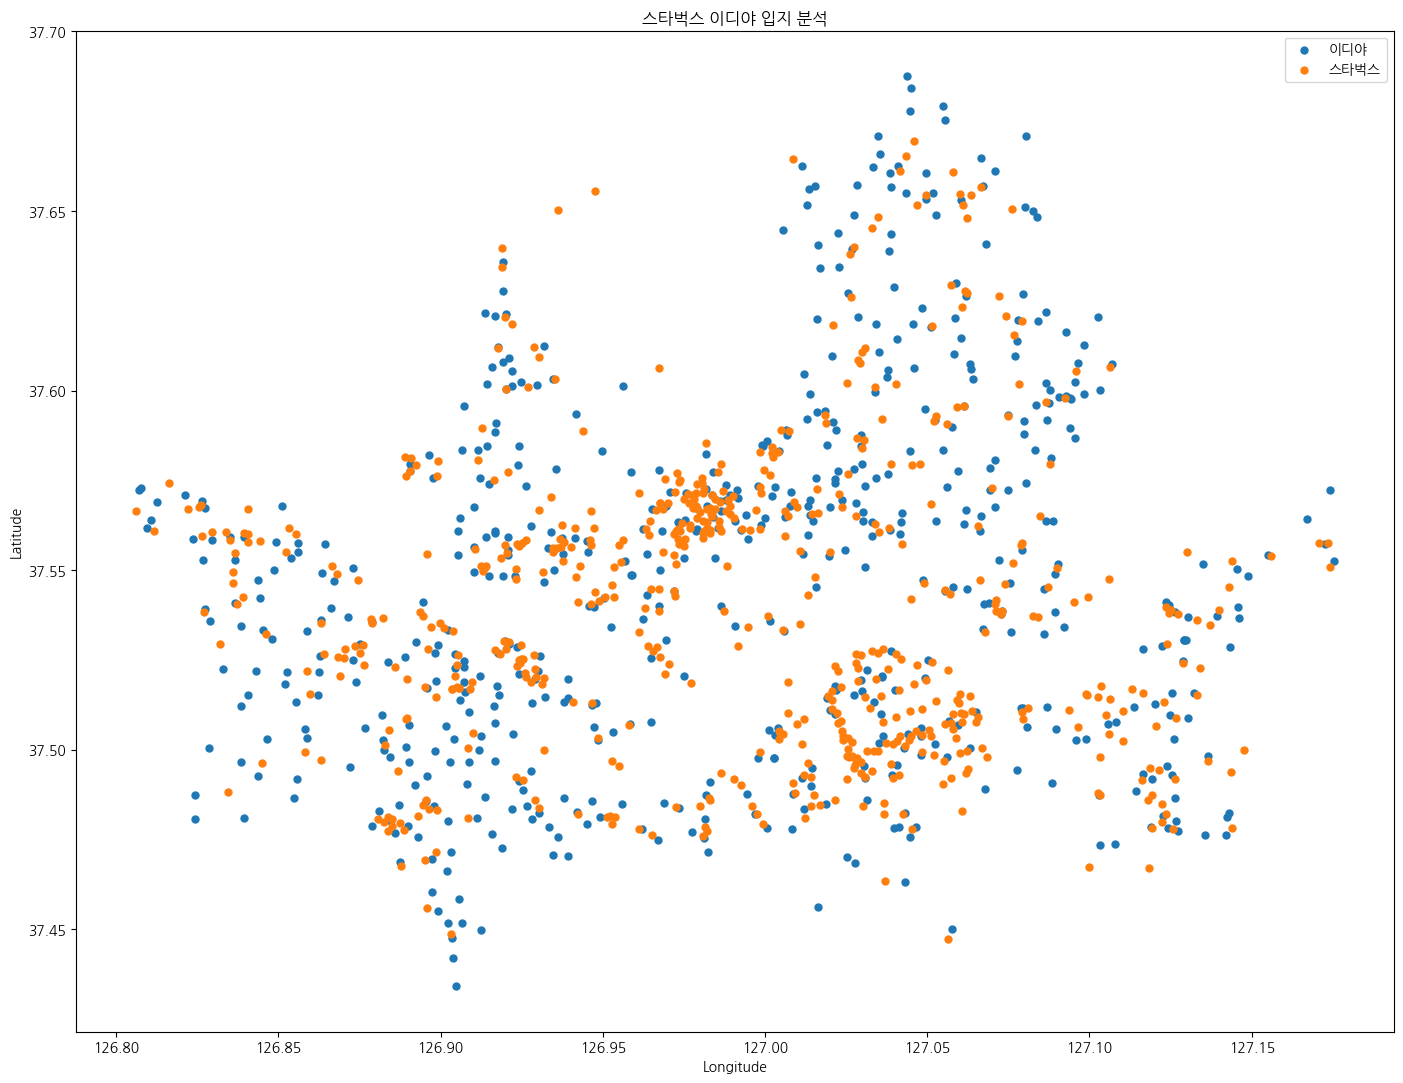

In [130]:
plt.figure(figsize=(17, 13))
for brand, marker in [('이디야', '.'), ('스타벅스', '.')]:
    subset = combined_df[combined_df['브랜드'] == brand]
    plt.scatter(subset['lng'], subset['lat'], s=100, marker=marker, label=brand)

plt.title('스타벅스 이디야 입지 분석')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

## 3.2. DBSCAN을 통해 클러스터링을 하는 함수만들기
### 일단 위도, 경도를 라디안으로 변경하여 haversine으로 거리 측정할 수 있게하였고
### 각 클러스터 군집에 적어도 하나 이상의 타 브랜드 매장이 존재하는 클러스터만 valid_df에 매핑하였다
### eps는 한 데이터 포인트에서 다른 데이터 포인트까지의 최대 거리를 나타내며, 이 거리 이내에 있는 점들은 서로 "이웃"으로 간주됩니다

In [131]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from haversine import haversine, Unit

def clustering(df, eps_meters, min_samples, brands):
    # 지구의 평균 반경 (미터 단위)
    earth_radius = 6371000
    
    # 라디안으로 eps 변환
    eps_radians = eps_meters / earth_radius
    
    # 위도와 경도를 라디안으로 변환
    coordinates_radians = np.radians(df[['lat', 'lng']].values)
    
    # DBSCAN 모델 생성 및 실행
    dbscan = DBSCAN(eps=eps_radians, min_samples=min_samples, algorithm='ball_tree', metric='haversine')
    clusters = dbscan.fit_predict(coordinates_radians)
    
    # 군집 결과를 데이터에 추가
    df['cluster'] = clusters
    
    # 각 클러스터에 모든 브랜드가 적어도 하나 있도록 필터링
    valid_clusters = []
    for cluster_id in np.unique(df['cluster']):
        cluster_data = df[df['cluster'] == cluster_id]
        brand_counts = cluster_data['브랜드'].value_counts()
        if all(brand in brand_counts and brand_counts[brand] > 0 for brand in brands):
            valid_clusters.append(cluster_id)
    
    # 유효한 클러스터만 필터링된 데이터프레임 생성
    valid_df = df[df['cluster'].isin(valid_clusters)]

    return valid_df


## 3.2.1. eps 50 기준으로 DBSCAN으로 군집화해보기

In [132]:
eps_50m_df = clustering(combined_df, 50, 2,combined_df['브랜드'].unique())

In [133]:
eps_50m_df['cluster'].value_counts()

cluster
-1     1127
 31       3
 11       3
 17       2
 32       2
 30       2
 29       2
 27       2
 26       2
 25       2
 24       2
 23       2
 22       2
 19       2
 16       2
 0        2
 13       2
 12       2
 10       2
 9        2
 8        2
 7        2
 5        2
 4        2
 3        2
 2        2
 1        2
 33       2
Name: count, dtype: int64

## 3.2.2. eps 100m 기준 DBSCAN 클러스터링

In [134]:
eps_100m_df = clustering(combined_df, 100, 2, combined_df['브랜드'].unique())

In [135]:
eps_100m_df

매장이름  구이름                            주소        lat         lng  \
0       강남세곡DT  강남구       서울특별시 강남구 헌릉로 727 (세곡동)  37.466994  127.118331   
1        역삼이마트  강남구       서울특별시 강남구 역삼로 310 (역삼동)  37.499367  127.048425   
2          청담역  강남구       서울특별시 강남구 삼성로 709 (청담동)  37.519441  127.049553   
3          삼성동  강남구    서울특별시 강남구 영동대로96길 12 (삼성동)  37.510843  127.063633   
5     테헤란로아남타워  강남구      서울특별시 강남구 테헤란로 311 (역삼동)  37.503830  127.044870   
...        ...  ...                           ...        ...         ...   
1206    중랑교차로점  중랑구          서울 중랑구 동일로 683 (면목동)  37.591448  127.079882   
1207     중랑묵동점  중랑구  서울 중랑구 동일로 932 (묵동, 묵동자이아파트)  37.613779  127.077524   
1208      중랑역점  중랑구          서울 중랑구 망우로 198 (상봉동)  37.593285  127.074889   
1209      중화동점  중랑구        서울 중랑구 동일로129길 1 (중화동)  37.601957  127.086627   
1210     화랑대역점  중랑구   서울 중랑구 신내로25가길 2 (묵동, 현동학당)  37.619451  127.084160   

       브랜드  cluster  
0     스타벅스       -1  
1     스타벅스       -1  
2     스타벅스        0  
3     스타벅스       -1  
5     스타벅스        2  
...    ...      ...  
1206   이디야       -1  
1207   이디야       -1  
1208   이디야      110  
1209   이디야       -1  
1210   이디야       -1  

[1141 rows x 7 columns]

## 3.2.3. eps 150m 기준 클러스터링

In [136]:
eps_150m_df = clustering(combined_df, 150, 2, combined_df['브랜드'].unique())

In [137]:
eps_150m_df['cluster'].value_counts()

cluster
-1      740
 166      8
 31       7
 160      6
 162      5
       ... 
 69       2
 67       2
 66       2
 65       2
 87       2
Name: count, Length: 147, dtype: int64

## 3.2.4. eps 200m 기준 클러스터링

In [138]:
eps_200m_df = clustering(combined_df, 200, 2, combined_df['브랜드'].unique())

In [139]:
eps_200m_df['cluster'].value_counts()

cluster
-1      582
 178     18
 185     17
 186     14
 179     11
       ... 
 90       2
 89       2
 87       2
 86       2
 103      2
Name: count, Length: 173, dtype: int64

## 3.2.5. eps 250m 기준 클러스터링

In [140]:
eps_250m_df = clustering(combined_df, 250, 2, combined_df['브랜드'].unique())

In [141]:
eps_250m_df['cluster'].value_counts()

cluster
-1      481
 178     75
 4       20
 5       18
 2       13
       ... 
 90       2
 26       2
 86       2
 85       2
 111      2
Name: count, Length: 174, dtype: int64

## 3.2.6. eps 350m 기준 클러스터링

In [142]:
eps_350m_df = clustering(combined_df, 350, 2, combined_df['브랜드'].unique())

In [143]:
eps_350m_df['cluster'].value_counts()

cluster
-1      288
 165     97
 0       58
 141     18
 92      18
       ... 
 137      2
 85       2
 38       2
 142      2
 179      2
Name: count, Length: 165, dtype: int64

## 3.2.7. eps 500m 기준 클러스터링

In [144]:
eps_500m_df = clustering(combined_df, 500, 2, combined_df['브랜드'].unique())

In [145]:
eps_500m_df['cluster'].value_counts()

cluster
-1      146
 0      122
 71     112
 57      61
 101     29
       ... 
 81       2
 92       2
 89       2
 33       2
 12       2
Name: count, Length: 117, dtype: int64

## 3.3. [문제3번] 한 클러스터내의 두 브랜드 매장간 평균 거리 계산하는 함수

In [146]:
# 클러스터별 두 브랜드 매장 간 평균 거리를 계산하는 함수
def cal_avg_dist_in_cluster(df, brand1, brand2):
    average_distances = {}
    for cluster_label, cluster_data in df.groupby('cluster'):
        brand1_locations = cluster_data[cluster_data['브랜드'] == brand1][['lat', 'lng']]
        brand2_locations = cluster_data[cluster_data['브랜드'] == brand2][['lat', 'lng']]
        
        # 모든 매장 쌍의 거리 계산
        distances = []
        for loc1 in brand1_locations.itertuples(index=False):
            for loc2 in brand2_locations.itertuples(index=False):
                distance = geodesic((loc1.lat, loc1.lng), (loc2.lat, loc2.lng)).meters
                distances.append(distance)
        
        # 거리의 평균을 계산
        if distances:
            average_distance = sum(distances) / len(distances)
        else:
            average_distance = None
        
        average_distances[cluster_label] = average_distance
        
    return average_distances

## 3.4. [문제3번] 한 클러스터 내의 다른 브랜드 매장과의 최단거리 구하는 함수

In [147]:
def min_distance_within_cluster(data, cluster_label):
    # 해당 클러스터의 데이터만 추출
    cluster_data = data[data['cluster'] == cluster_label]
    min_dist = np.inf
    # 각 데이터 포인트들 사이의 거리를 계산
    for i, row1 in cluster_data.iterrows():
        for j, row2 in cluster_data.iterrows():
            if i < j and row1['브랜드'] != row2['브랜드']:
                # 두 좌표 사이의 거리를 계산
                coord1 = (row1['lat'], row1['lng'])
                coord2 = (row2['lat'], row2['lng'])
                dist = geodesic(coord1, coord2).meters
                # 최소 거리 업데이트
                if dist < min_dist:
                    min_dist = dist
    return min_dist

## 3.5. [문제3번] 각 클러스터의 중심점 구하는 함수

In [156]:
def calculate_centroid(cluster_data):
    centroid = cluster_data[['lat', 'lng']].mean().values
    return centroid

In [157]:
# 모든 클러스터별 중심점을 계산하는 함수 정의
def calculate_centroids(df):
    centroids = {}
    for cluster_label in df['cluster'].unique():
        cluster_data = df[df['cluster'] == cluster_label]
        centroid = calculate_centroid(cluster_data)
        centroids[cluster_label] = centroid
    return centroids

## 3.6. [문제3번] folium으로 시각화하는 함수
### 스타벅스 아이콘은 적색, 이디야 커피 아이콘은 하늘색으로 지정하였다.
### 각 아이콘을 누르면 브랜드 이름과 클러스터 번호가 표시된다
### 파란색원의 중심은 각 클러스터 중심(centeroid)들이다.
###  MeasureControl 플러그인을 추가하여 지도상 거리 측정 가능하게 하였다.
### 여기서 cluster가 -1인 곳은 클러스터(군집)으로 묶이지 않은 곳들이다
### 지도를 확대하면 나오는 빨간 선들은 각 군집내 다른 브랜드와의 최소거리를 연결하는 선이다

In [160]:
import folium
from folium.plugins import MarkerCluster, MeasureControl
from geopy.distance import geodesic

def create_clustered_map(data, brand_colors):
    # 중심 좌표를 계산합니다.
    center_of_map = data[['lat', 'lng']].mean().values.tolist()
    m = folium.Map(location=center_of_map, zoom_start=12)

    # 군집별 마커 클러스터를 만듭니다.
    marker_clusters = {}
    for cluster in data['cluster'].unique():
        if cluster != -1:
            marker_clusters[cluster] = MarkerCluster().add_to(m)

    # 군집별로 처리합니다.
    for cluster_label in data['cluster'].unique():
        if cluster_label != -1:  # 클러스터 -1은 노이즈 포인트를 나타냄
            cluster_data = data[data['cluster'] == cluster_label]
            min_dist = np.inf
            min_pair = None
            for i, row1 in cluster_data.iterrows():
                for j, row2 in cluster_data.iterrows():
                    if i != j and row1['브랜드'] != row2['브랜드']:
                        coord1 = (row1['lat'], row1['lng'])
                        coord2 = (row2['lat'], row2['lng'])
                        dist = geodesic(coord1, coord2).meters
                        if dist < min_dist:
                            min_dist = dist
                            min_pair = (coord1, coord2)
            if min_pair:
                folium.PolyLine([min_pair[0], min_pair[1]], color='red', weight=2.5, opacity=1).add_to(m)
            centroids = calculate_centroids(cluster_data)
            centroid_location = centroids[cluster_label]
            folium.Circle(
                location=centroid_location,
                radius=len(cluster_data) * 10,
                color='blue',
                fill=True,
                fill_color='blue',
                fill_opacity=0.6
            ).add_to(m)

    # 각 데이터 포인트를 지도에 추가합니다.
    for _, row in data.iterrows():
        brand_color = brand_colors.get(row['브랜드'], 'gray')
        if row['cluster'] != -1:  # 노이즈 군집을 제외합니다.

            folium.Marker(
                location=[row['lat'], row['lng']],
                popup=f"Brand: {row['브랜드']}\nCluster: {row['cluster']}",
                icon=folium.Icon(color=brand_color)
            ).add_to(marker_clusters[row['cluster']])

    # MeasureControl 플러그인을 지도에 추가합니다.
    measure_control = MeasureControl(position='topleft',
                                             primary_length_unit='kilometers',
                                             secondary_length_unit='meters',
                                             primary_area_unit='sqmeters',
                                             secondary_area_unit='acres')
    m.add_child(measure_control)

    return m

## 3.7. [문제3번] 내가 거리기준을 정한 기준:
- 신문기사를 찾아보니 현재 컴포즈커피와 메가커피는 250m 거리 제한을 두고 있으며
- 공정위는 2012년 프랜차이즈 업계 제과,제빵, 카페에 대해 출점 제한을 500ｍ로 두었다가 2015년 폐지했다
- 공정위가 그 기준을 정한 이유는 지하철역 간 거리가 대략 1㎞고, 재래시장에서부터 대형유통점(SSM)까지 거리 제한이 500ｍ인 점을 감안했다고 밝히고 있다.
- 프랜차이즈 매장이 도시에 집중된 산업임을 고려하고 공정위의 기준, 각 프랜차이즈 브랜드의 기준을 고려하여
- 250m, 350m, 500m에 대해 집중적으로 분석해보았다


## 3.8. eps 250m에 대해 군집별 시각화

In [161]:
calculate_centroids(eps_250m_df)
create_clustered_map(eps_250m_df, {'이디야':'blue','스타벅스':'red'})

In [162]:
eps_250m_df

매장이름  구이름                            주소        lat         lng  \
0       강남세곡DT  강남구       서울특별시 강남구 헌릉로 727 (세곡동)  37.466994  127.118331   
1        역삼이마트  강남구       서울특별시 강남구 역삼로 310 (역삼동)  37.499367  127.048425   
2          청담역  강남구       서울특별시 강남구 삼성로 709 (청담동)  37.519441  127.049553   
3          삼성동  강남구    서울특별시 강남구 영동대로96길 12 (삼성동)  37.510843  127.063633   
5     테헤란로아남타워  강남구      서울특별시 강남구 테헤란로 311 (역삼동)  37.503830  127.044870   
...        ...  ...                           ...        ...         ...   
1205      양원역점  중랑구      서울 중랑구 양원역로14가길 24 (망우동)  37.607490  127.106951   
1206    중랑교차로점  중랑구          서울 중랑구 동일로 683 (면목동)  37.591448  127.079882   
1207     중랑묵동점  중랑구  서울 중랑구 동일로 932 (묵동, 묵동자이아파트)  37.613779  127.077524   
1208      중랑역점  중랑구          서울 중랑구 망우로 198 (상봉동)  37.593285  127.074889   
1210     화랑대역점  중랑구   서울 중랑구 신내로25가길 2 (묵동, 현동학당)  37.619451  127.084160   

       브랜드  cluster  
0     스타벅스       -1  
1     스타벅스        0  
2     스타벅스        1  
3     스타벅스        2  
5     스타벅스        4  
...    ...      ...  
1205   이디야      187  
1206   이디야       -1  
1207   이디야      188  
1208   이디야      191  
1210   이디야       -1  

[1131 rows x 7 columns]

## 3.9. eps 350m에 대해 군집별 시각화

In [163]:
calculate_centroids(eps_200m_df)
create_clustered_map(eps_200m_df, {'이디야':'blue','스타벅스':'red'})

## 3.10. eps 500m에 대해 시각화

In [164]:
calculate_centroids(eps_500m_df)
create_clustered_map(eps_500m_df, {'이디야':'blue','스타벅스':'red'})

In [165]:
eps_500m_df

매장이름  구이름                            주소        lat         lng   브랜드  \
0     강남세곡DT  강남구       서울특별시 강남구 헌릉로 727 (세곡동)  37.466994  127.118331  스타벅스   
1      역삼이마트  강남구       서울특별시 강남구 역삼로 310 (역삼동)  37.499367  127.048425  스타벅스   
2        청담역  강남구       서울특별시 강남구 삼성로 709 (청담동)  37.519441  127.049553  스타벅스   
3        삼성동  강남구    서울특별시 강남구 영동대로96길 12 (삼성동)  37.510843  127.063633  스타벅스   
4       강남논현  강남구      서울특별시 강남구 강남대로 512 (논현동)  37.507898  127.023339  스타벅스   
...      ...  ...                           ...        ...         ...   ...   
1206  중랑교차로점  중랑구          서울 중랑구 동일로 683 (면목동)  37.591448  127.079882   이디야   
1207   중랑묵동점  중랑구  서울 중랑구 동일로 932 (묵동, 묵동자이아파트)  37.613779  127.077524   이디야   
1208    중랑역점  중랑구          서울 중랑구 망우로 198 (상봉동)  37.593285  127.074889   이디야   
1209    중화동점  중랑구        서울 중랑구 동일로129길 1 (중화동)  37.601957  127.086627   이디야   
1210   화랑대역점  중랑구   서울 중랑구 신내로25가길 2 (묵동, 현동학당)  37.619451  127.084160   이디야   

      cluster  
0          -1  
1           0  
2           0  
3           0  
4           0  
...       ...  
1206      121  
1207       46  
1208      121  
1209      119  
1210       46  

[1162 rows x 7 columns]

## 3.11. 근데 eps 250m, 350m, 500m에 대해 시각화하고 분석해보니
### eps_500m의 eps가 가장 커서 eps 500m일 때의 하나의 클러스터내 매장들은 250m와 350m에서의 하나의 클러스터 내의 매장들도 포함함
### 그렇기 때문에 eps_500m의 결과를 바탕으로
### 모든 클러스터에 대해 한클러스터 내의 타 브랜드 매장과의 거리 평균을 구해보자 

## 3.12. [문제3 풀이] 한 클러스터 내의 한 브랜드와 다른 브랜드 매장간의 평균 거리(단위 meter) 계산하는 함수

In [166]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import haversine_distances

def cal_dist_brands(data, cluster_number):
    # 선택한 클러스터 데이터 필터링
    cluster_data = data[data['cluster'] == cluster_number].copy()  # Create a copy to avoid SettingWithCopyWarning

    # 위도와 경도를 라디안으로 변환
    cluster_data.loc[:, 'lat_rad'] = np.radians(cluster_data['lat'])
    cluster_data.loc[:, 'lng_rad'] = np.radians(cluster_data['lng'])

    # 좌표 배열 생성
    coords = cluster_data[['lat_rad', 'lng_rad']].to_numpy()

    # 거리 행렬 계산
    distance_matrix = haversine_distances(coords) * 6371  # km 단위로 변환

    # 브랜드별 평균 거리 계산
    for brand in cluster_data['브랜드'].unique():
        # Get the indices of the current DataFrame, not the original
        brand_indices = np.where(cluster_data['브랜드'] == brand)[0]
        other_brand_indices = np.where(cluster_data['브랜드'] != brand)[0]

        # 해당 브랜드와 다른 브랜드 사이의 거리
        brand_to_other_distances = distance_matrix[np.ix_(brand_indices, other_brand_indices)]

        # 평균 거리 계산 및 저장
        average_distance = brand_to_other_distances.mean() if brand_to_other_distances.size > 0 else np.nan

    return average_distance

## 3.13. 모든 클러스터에 대해 한 클러스터 내 다른 브랜드와의 거리(단위 meter)의 평균 구하는 함수

In [167]:
def cal_dist_all_clust(data):

    unique_clusters = data['cluster'].unique()
    for cluster_number in unique_clusters:
        if cluster_number != -1:
            brand_distances = cal_dist_brands(data, cluster_number)
            data.loc[data['cluster'] == cluster_number, 'cluster_avg_dist(m)'] = brand_distances * 1000
        else:
            data.loc[data['cluster'] == cluster_number, 'cluster_avg_dist(m)'] = np.nan
    return 

## 3.14. 모든 클러스터에 대해 한 클러스터 내의 다른 브랜드 매장과의 최단거리(단위 meter) 구하는 함수

In [168]:
def min_distance_within_cluster(data, cluster_label):
    # 해당 클러스터의 데이터만 추출
    cluster_data = data[data['cluster'] == cluster_label]
    min_dist = np.inf
    # 각 데이터 포인트들 사이의 거리를 계산
    for i, row1 in cluster_data.iterrows():
        for j, row2 in cluster_data.iterrows():
            if i < j and row1['브랜드'] != row2['브랜드']:
                # 두 좌표 사이의 거리를 계산
                coord1 = (row1['lat'], row1['lng'])
                coord2 = (row2['lat'], row2['lng'])
                dist = geodesic(coord1, coord2).meters
                # 최소 거리 업데이트
                if dist < min_dist:
                    min_dist = dist
    return min_dist

def min_distance_all_clusters(data):
    unique_clusters = data['cluster'].unique()
    for cluster_label in unique_clusters:
        if cluster_label != -1:
            cluster_min_distances = min_distance_within_cluster(data, cluster_label)
            data.loc[data['cluster'] == cluster_label, 'cluster_min_dist(m)'] = cluster_min_distances
            
        else:
            data.loc[data['cluster'] == cluster_label, 'cluster_min_dist(m)'] = np.nan

In [169]:
cal_dist_all_clust(eps_500m_df)

C:\Users\kd010\AppData\Local\Temp\ipykernel_17152\1353825301.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['cluster'] == cluster_number, 'cluster_avg_dist(m)'] = np.nan


In [170]:
min_distance_all_clusters(eps_500m_df)

C:\Users\kd010\AppData\Local\Temp\ipykernel_17152\233431917.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['cluster'] == cluster_label, 'cluster_min_dist(m)'] = np.nan


## 3.15. 각 클러스터 내의 데이터포인트(매장)수를 새 칼럼에 넣기

In [171]:
eps_500m_df['cluster_count'] = eps_500m_df.groupby('cluster')['cluster'].transform('count')

C:\Users\kd010\AppData\Local\Temp\ipykernel_17152\2819636267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eps_500m_df['cluster_count'] = eps_500m_df.groupby('cluster')['cluster'].transform('count')


## 3.16. 각 클러스터 내의 타 브랜드와의 최단거리를 cluster_min_dist 칼럼에 넣음(클러스터 -1인 것은 군집화되지 않은 것이라 NaN으로 해줌)
### 각 클러스터 내의 데이터포인트(점포수)를 cluster_count 칼럼에 넣음

In [172]:
eps_500m_df

매장이름  구이름                            주소        lat         lng   브랜드  \
0     강남세곡DT  강남구       서울특별시 강남구 헌릉로 727 (세곡동)  37.466994  127.118331  스타벅스   
1      역삼이마트  강남구       서울특별시 강남구 역삼로 310 (역삼동)  37.499367  127.048425  스타벅스   
2        청담역  강남구       서울특별시 강남구 삼성로 709 (청담동)  37.519441  127.049553  스타벅스   
3        삼성동  강남구    서울특별시 강남구 영동대로96길 12 (삼성동)  37.510843  127.063633  스타벅스   
4       강남논현  강남구      서울특별시 강남구 강남대로 512 (논현동)  37.507898  127.023339  스타벅스   
...      ...  ...                           ...        ...         ...   ...   
1206  중랑교차로점  중랑구          서울 중랑구 동일로 683 (면목동)  37.591448  127.079882   이디야   
1207   중랑묵동점  중랑구  서울 중랑구 동일로 932 (묵동, 묵동자이아파트)  37.613779  127.077524   이디야   
1208    중랑역점  중랑구          서울 중랑구 망우로 198 (상봉동)  37.593285  127.074889   이디야   
1209    중화동점  중랑구        서울 중랑구 동일로129길 1 (중화동)  37.601957  127.086627   이디야   
1210   화랑대역점  중랑구   서울 중랑구 신내로25가길 2 (묵동, 현동학당)  37.619451  127.084160   이디야   

      cluster  cluster_avg_dist(m)  cluster_min_dist(m)  cluster_count  
0          -1                  NaN                  NaN            146  
1           0          2029.934062            26.757500            122  
2           0          2029.934062            26.757500            122  
3           0          2029.934062            26.757500            122  
4           0          2029.934062            26.757500            122  
...       ...                  ...                  ...            ...  
1206      121           416.581523            31.102115              4  
1207       46           708.518323           131.666388              8  
1208      121           416.581523            31.102115              4  
1209      119           700.718006            90.658303             15  
1210       46           708.518323           131.666388              8  

[1162 rows x 10 columns]

## 3.17. [문제3번] 성인의 평균 걷는 속도는 대략 시속 5킬로미터(km/h) 정도임
### 1000미터를 걷는 데는 대략 12분 정도 걸립니다
- 도심에서 12분 정도 거리는 하나의 상권으로 봐도 된다고 생각하여 1000m이내를 기준으로 분석함

## 3.18. [문제3번] 한 클러스터 내의 타 브랜드 점포와의 최단거리 시각화
- 그래프 보면 모든 클러스터에 대해서 500m 이하인 것을 볼 수 있음

C:\Users\kd010\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kd010\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


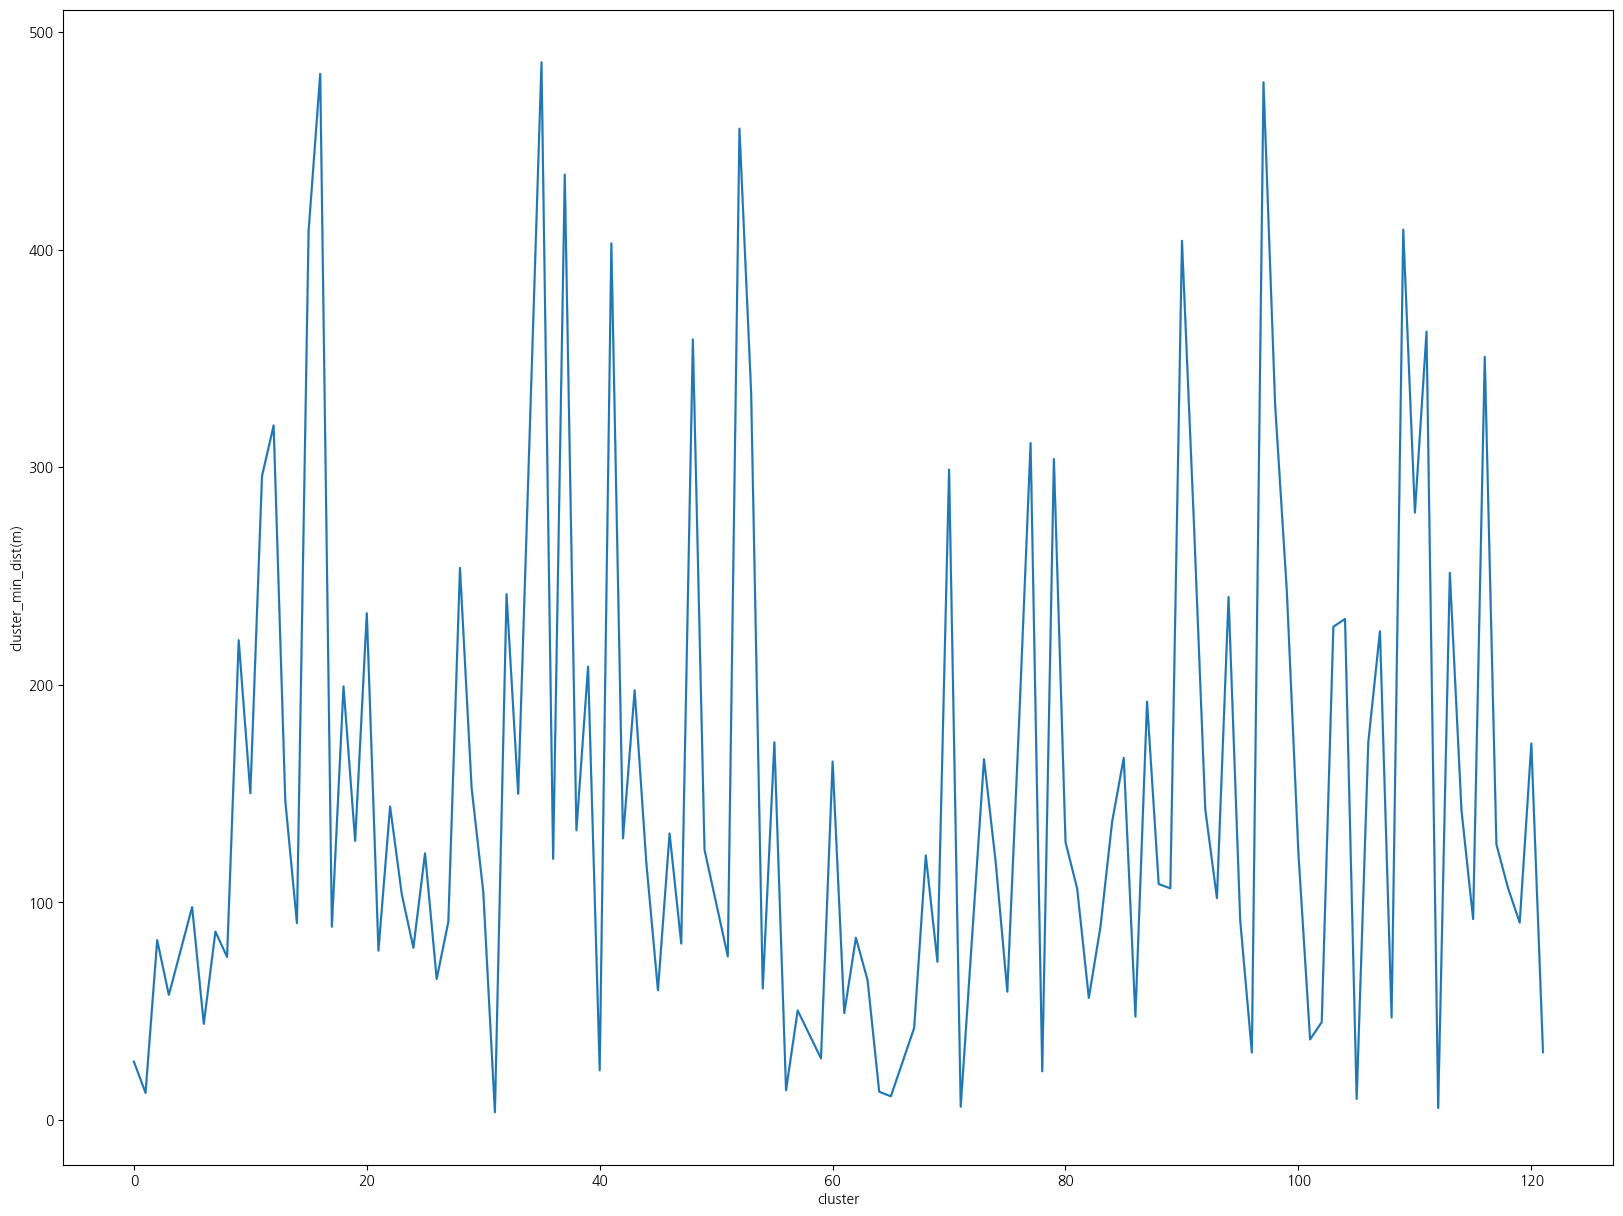

In [173]:
plt.figure(figsize=(20,15))
sns.lineplot(data= eps_500m_df, x= 'cluster', y = 'cluster_min_dist(m)')
plt.show();

## 3.19. [문제3번] 각 클러스터 내의 타 브랜드 점포와의 평균 거리
- 그래프 보면 거의 대부분의 클러스터에서 1000m 이하인 것을 볼 수 있다

C:\Users\kd010\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kd010\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


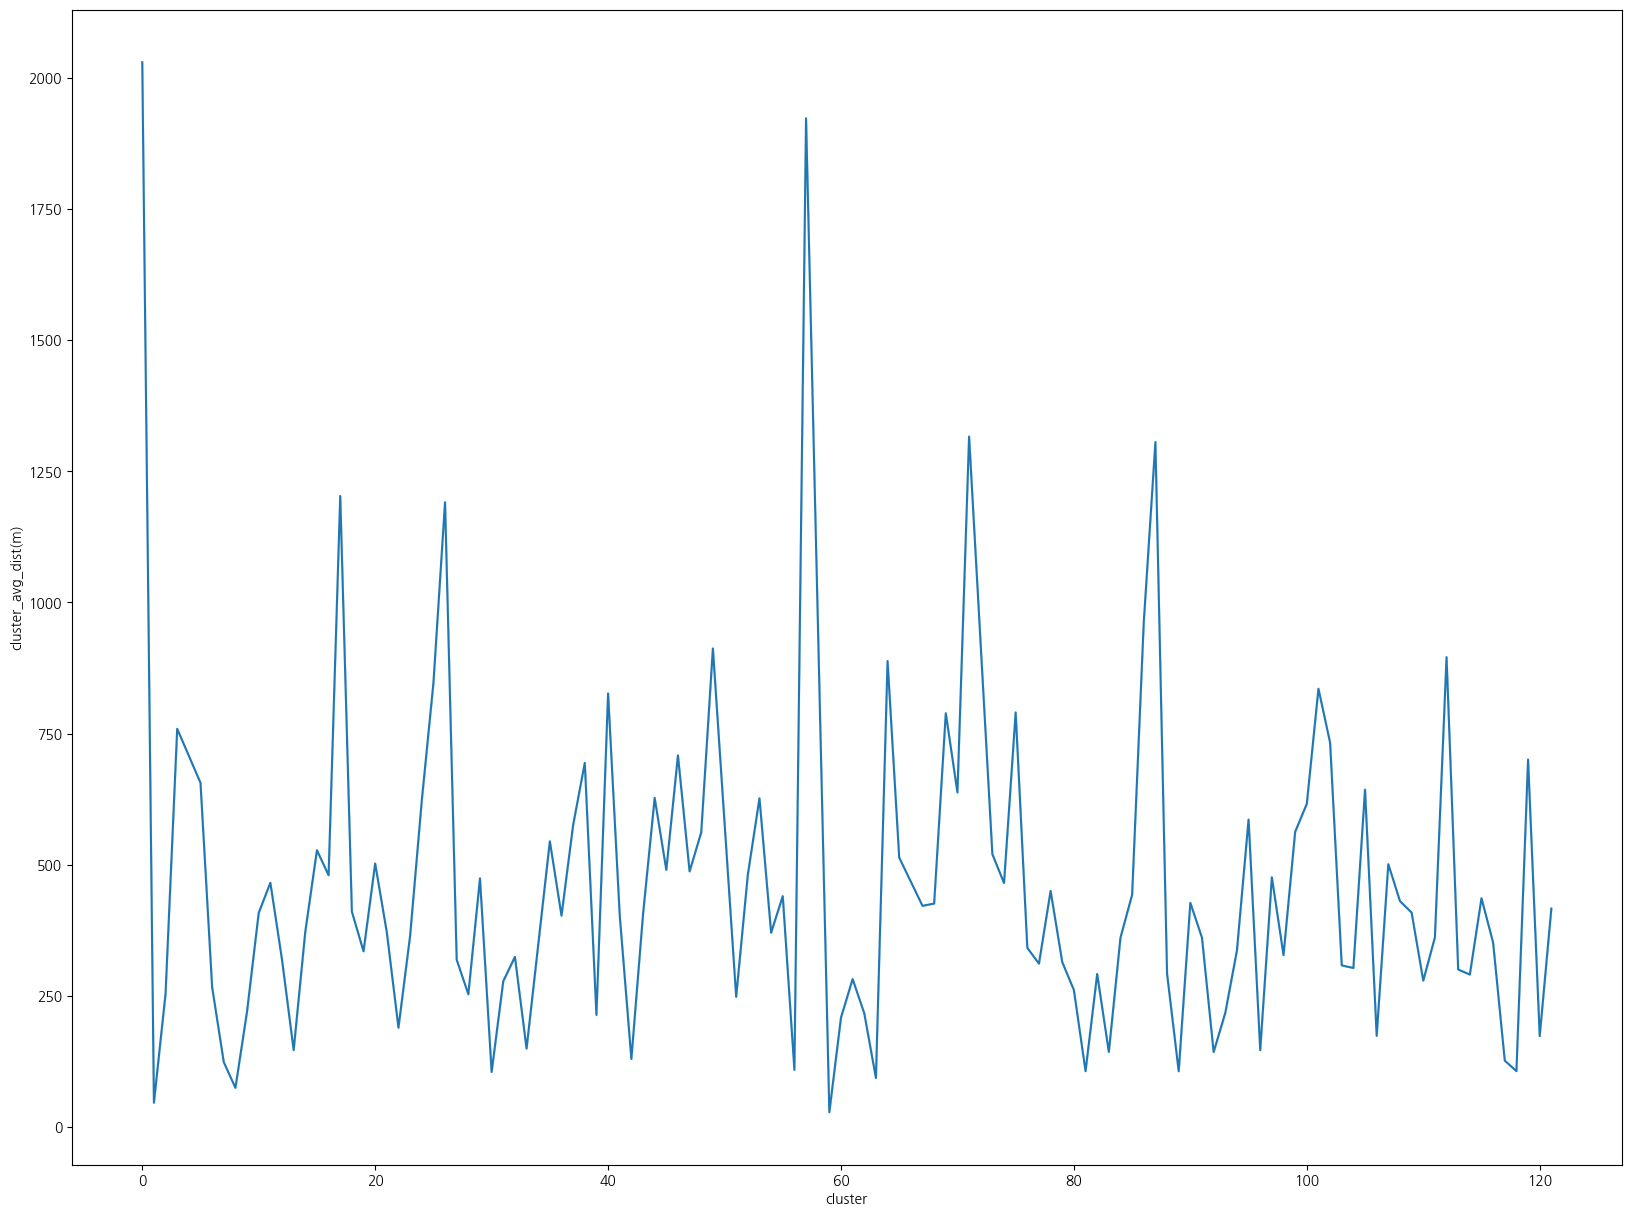

In [174]:
plt.figure(figsize=(20,15))
sns.lineplot(data= eps_500m_df, x= 'cluster', y = 'cluster_avg_dist(m)')
plt.show();

## 3.20. 한 클러스터 내의 타 브랜드 점포와의 거리의 평균이 1000m 이하인 데이터를 각 브랜드 별로 조회해보자

In [175]:
cond1 = eps_500m_df['cluster_avg_dist(m)'] <= 1000
cond2 = eps_500m_df['브랜드'] == '스타벅스'
cond3 = eps_500m_df['브랜드'] == '이디야'

## 3.21. 이디야에 대해서는 위 조건 만족하는 점포가 332개

In [176]:
eps_500m_df[cond1 & cond3]

매장이름  구이름                                  주소        lat         lng  \
620    도곡2동점  강남구          서울 강남구 논현로 142 (도곡동, 동현빌딩)  37.482435  127.042993   
628     수서역점  강남구      서울 강남구 광평로 280 (수서동, 로즈데일오피스텔)  37.487342  127.103002   
632   역삼더블루점  강남구  서울 강남구 논현로63길 16 (역삼동, 역삼종합시장 더블루)  37.492909  127.039072   
636      역삼점  강남구              서울 강남구 논현로72길 13 (역삼동)  37.495841  127.040544   
645   포이사거리점  강남구                서울 강남구 개포로 218 (개포동)  37.478468  127.046625   
...      ...  ...                                 ...        ...         ...   
1206  중랑교차로점  중랑구                서울 중랑구 동일로 683 (면목동)  37.591448  127.079882   
1207   중랑묵동점  중랑구        서울 중랑구 동일로 932 (묵동, 묵동자이아파트)  37.613779  127.077524   
1208    중랑역점  중랑구                서울 중랑구 망우로 198 (상봉동)  37.593285  127.074889   
1209    중화동점  중랑구              서울 중랑구 동일로129길 1 (중화동)  37.601957  127.086627   
1210   화랑대역점  중랑구         서울 중랑구 신내로25가길 2 (묵동, 현동학당)  37.619451  127.084160   

      브랜드  cluster  cluster_avg_dist(m)  cluster_min_dist(m)  cluster_count  
620   이디야        3           759.228288            57.423629             11  
628   이디야        1            46.293854            12.379579              3  
632   이디야        2           254.242428            82.584885              5  
636   이디야        2           254.242428            82.584885              5  
645   이디야        3           759.228288            57.423629             11  
...   ...      ...                  ...                  ...            ...  
1206  이디야      121           416.581523            31.102115              4  
1207  이디야       46           708.518323           131.666388              8  
1208  이디야      121           416.581523            31.102115              4  
1209  이디야      119           700.718006            90.658303             15  
1210  이디야       46           708.518323           131.666388              8  

[332 rows x 10 columns]

## 3.22. 스타벅스에 대해서는 위 조건 만족하는 점포가 325개

In [177]:
eps_500m_df[cond1 & cond2]

매장이름  구이름                                      주소        lat  \
14   수서역사거리  강남구                 서울특별시 강남구 광평로 280 (수서동)  37.487327   
26     역삼럭키  강남구                 서울특별시 강남구 도곡로 183 (역삼동)  37.492209   
35       포이  강남구                  서울특별시 강남구 논현로 88 (개포동)  37.477811   
39   구역삼사거리  강남구                 서울특별시 강남구 논현로 401 (역삼동)  37.495924   
72     도곡공원  강남구                 서울특별시 강남구 도곡로 205 (역삼동)  37.492805   
..      ...  ...                                     ...        ...   
605     상봉역  중랑구                 서울특별시 중랑구 망우로 307 (상봉동)  37.596890   
606    사가정역  중랑구                       서울특별시 중랑구 면목로 310  37.579594   
607    중랑구청  중랑구                        서울특별시 중랑구 신내로 72  37.605389   
608     중랑역  중랑구                서울특별시 중랑구 망우로30길 3 (상봉동)  37.593033   
609      상봉  중랑구  서울특별시 중랑구 상봉로 131 (상봉동, 상봉 듀오트리스 주상복합)  37.597842   

            lng   브랜드  cluster  cluster_avg_dist(m)  cluster_min_dist(m)  \
14   127.103140  스타벅스        1            46.293854            12.379579   
26   127.039389  스타벅스        2           254.242428            82.584885   
35   127.045141  스타벅스        3           759.228288            57.423629   
39   127.038865  스타벅스        2           254.242428            82.584885   
72   127.041309  스타벅스        2           254.242428            82.584885   
..          ...   ...      ...                  ...                  ...   
605  127.086470  스타벅스      119           700.718006            90.658303   
606  127.087966  스타벅스      120           173.345446           173.031451   
607  127.095756  스타벅스      119           700.718006            90.658303   
608  127.074736  스타벅스      121           416.581523            31.102115   
609  127.092509  스타벅스      119           700.718006            90.658303   

     cluster_count  
14               3  
26               5  
35              11  
39               5  
72               5  
..             ...  
605             15  
606              2  
607             15  
608              4  
609             15  

[325 rows x 10 columns]

## 3.23. [문제3번결론] : 문제3번을 풀면서 해온 모든 고민들과 시각화들, 데이터프레임의 정보들과
### DBSCAN으로 군집화하고 folium으로 시각화한 정보들을 모두 종합해보면 
### 이디야의 서울내 점포수가 601개인데 그 중 332개 점포(50%가 넘는 점포)가 스타벅스와의 거리가 평균 1km 이내이다
### 따라서 이디야는 스타벅스의 출점 위치를 따라하는 전략을 구사했다고 충분히 볼 수 있겠다.